# SVD/PCA Algorithm

## Theory behind SVD and PCA

The Spectral Theorem assures us that for any $(n,n)$ shaped, symmetric real matrix say $\mathrm{B}$, we can decompose it as $\mathrm{B}=\mathrm{Q}\mathrm{\Lambda}\mathrm{Q^{T}}$, where $\mathrm{Q}$ is an orthonormal matrix having as columns the eigenvectors of $\mathrm{B}$ and $\mathrm{\Lambda}$ is a diagonal matrix containing the eigenvalues of $\mathrm{B}$.\
\
This theorem is powerful and a crucial pillar of linear algebra, yet restrictive when it comes to data science matrices, hardly ever displaying those features required in its assumptions. What tool can we then use to do some similar transformation not limited to square matrices?
\
\
What if we're dealing say with a matrix of data $\mathrm{A}=\begin{bmatrix}a_{1,1}&a_{1,2}\\a_{2,1}&a_{2,2}\\a_{3,1}&a_{3,2}\end{bmatrix}$ ? It is a rectangular matrix with having more observations that parameters, and we cannot apply the theorem above. This is a problem.
\
\
The solution comes up to be the **SVD**, or short for **Singular Values Decomposition**. In fact, in this case the so called Singular Values will be the closest possible substitutes to our old eigenvalues. In short matrix notation, the SVD is used to decompose our good old data matrix $\mathrm{A}$ into the following expression: 
\
\
$$\mathrm{A} = \mathrm{U}\  \mathrm{\Sigma}\  \mathrm{V^{T}}$$
\
Where $\mathrm{A}$ is of shape $(n,m)$, $\mathrm{U}$ is of shape $(n,r)$, $\mathrm{\Sigma}$ is of shape $(r,r)$ and $\mathrm{V}^T$ is of shape $(r,m).$
\
\
What will these mysterious new animals $\mathrm{U},\ \mathrm{\Sigma},\ \mathrm{V^{T}}$ be? Admittedly we cannot do much, we've lost our favorite tool, the Spectral Theorem, so what shall we do? **Simple**, we tweak around stuff in such a way that we are still able to use it! I cannot use this trick directly on $\mathrm{A}$, but what if I consider $\mathrm{A}^{T}\mathrm{A}$ or $\mathrm{A}\mathrm{A}^{T}$ ?\
Turns out both of them are symmetric positive (at least) semi-definite matrices! And what happens when I do that in the equation above? Let's see.\
\
$$\mathrm{A}\mathrm{A}^{T} = (\mathrm{U}\  \mathrm{\Sigma}\  \mathrm{V^{T}})(\mathrm{U}\  \mathrm{\Sigma} \ \mathrm{V}^{T})^{T} = \mathrm{U}\ ( \mathrm{\Sigma}\    \mathrm{\Sigma}^T ) \mathrm{U}^{T} \ \ \ \ \ (1)$$
\
If we now allow $\mathrm{V}$ and $\mathrm{U}$ to be orthonormal, we have that by orthonormal properties, if a matrix $\mathrm{O}$ is orthonormal, then $\mathrm{O}^T = \mathrm{O}^{-1}$, which reduces the equation above to be 
\
$$\mathrm{A}\mathrm{A}^{T} = \mathrm{U}( \mathrm{\Sigma}  \mathrm{\Sigma}^T ) \mathrm{U}^{T} $$
\
But we've seen that form already, it's the Spectral Decomposition of the matrix $\mathrm{A}\mathrm{A}^{T}$! Thus $\mathrm{U}$ **must be the matrix containing as columns the eigenvectors of $\mathrm{A}\mathrm{A}^{T}$, and $( \mathrm{\Sigma}  \mathrm{\Sigma}^T )$ must be our diagonal matrix of eigenvalues**.
\
\
Same goes the other way now, 
$$\mathrm{A}^{T}\mathrm{A} = (\mathrm{V}\  \mathrm{\Sigma}^T \ \mathrm{U^{T}})(\mathrm{U}\  \mathrm{\Sigma} \ \mathrm{V}^{T}) = \mathrm{V}\  (\mathrm{\Sigma}\  \mathrm{\Sigma}^T)  \mathrm{V}^{T}\ \ \ \ \ (2)$$
\
We have then that $\mathrm{V}$ **must be the matrix containing as columns the eigenvectors of $\mathrm{A}^T\mathrm{A}$, and $( \mathrm{\Sigma}^T  \mathrm{\Sigma} )$ must be our diagonal matrix of eigenvalues**.
\
\
Since the data matrix is always the same one, the eigenvalues of $\mathrm{A}^{T}\mathrm{A}$ are the same ones as $\mathrm{A}\mathrm{A}^T$, making $\mathrm{\Sigma}\  \mathrm{\Sigma}^T = \mathrm{\Sigma}^T\  \mathrm{\Sigma}$
\
\
At this point we can use (1) and (2) to compute $\mathrm{U}, \mathrm{T}$ and $\mathrm{\Sigma}$.
\
This is all the SVD does for us. What is then the acronym **PCA**, short for **Principal Component Analysis**? It is in its simplest form a slight modification to the output of the SVD. Specifically it consists in arranging the components of $\mathrm{U}$, $\mathrm{\Sigma}$ and $\mathrm{V}^T$ in such away that the components of $\mathrm{\Sigma}$ are decreasing sliding down the diagonal. Mathematically $\mathrm{\Sigma}=\begin{bmatrix}\sigma_{1,1}&0&0\\0&\sigma_{2,2}&0\\0&0&\sigma_{3,3}\end{bmatrix}$, if we suppose it is $(3,3)$, where $\sigma_{1,1}\geq\sigma_{2,2}\geq\sigma_{2,2}$. This trick allows us to position the "most important" elements on top. An interpretation of the magnitude of $\sigma_{i,i}$ is "how much information do the column $i$ of $\mathrm{U}$ and row $i$ of $\mathrm{V}^T$ contain about the information in my matrix $\mathrm{A}$? Intuitively, the greater the magnitude of the $\sigma$ and the more info they contain.

I will bring you a short example to fully interpret what's going on begind the svd. Suppose our matrices are composed by vectors $u$'s and $v$'s

$$\mathrm{U} = \begin{bmatrix}|&|\\u_1&u_2\\|&|\end{bmatrix}_{(3x2)}, \mathrm{V} = \begin{bmatrix}-&v^{T}_1&-\\-&v^{T}_2&-\end{bmatrix}_{(2x3)}, \mathrm{\Sigma} = \begin{bmatrix}\sigma_1&0\\0&\sigma_2\end{bmatrix}_{(2x2)}$$

The matrix $\mathrm{A}$ deriving from their product can be written as a sum of rank 1 matrices (there's a theorem proving this, we will see here practically). Since our shapes are $(3x2) (2x2) (2x3)$, the resulting matrix will be A, a $(3,3)$ matrix. And we can obtain it as follows:

$$\mathrm{A} = \sigma_1 \begin{bmatrix}|\\u_1\\|\end{bmatrix}_{(3x1)}\begin{bmatrix}-&v^{T}_1&-\end{bmatrix}_{(1x3)} \ + \ \sigma_2 \begin{bmatrix}|\\u_2\\|\end{bmatrix}_{(3x1)}\begin{bmatrix}-&v^{T}_2&-\end{bmatrix}_{(1x3)}\ \ \ \ \ (3)$$

Because those two elements will create two matrices that are going to be summed up. And remember that the Singular Values $\sigma_{i,i}$ get progressively smaller in magnitude as i increases (as we slide down the diagonal).
\
\
**Interpretation: We can think of this algorithm as decomposing a matrix in many overlapping frames of numbers. Where the first frame will give us many infos about our matrix, and every frame stacked on top (matrix added after the first one) gives us progressively less and less infos.**

**PCA** refers then to the **"truncation"** of those three matrices $\mathrm{U}\  \mathrm{\Sigma}\  \mathrm{V^{T}}$ to obtain an approximation of the information contained in $\mathrm{A}$, given by the features that most contribute to its formation. Or alternatively, means: How many of the trailing elements (layers) in (3) can I cut off and still maintain a good amount of information from my initial matrix? The phenomena begs the question **at what index should I truncate?** Let's see it in practice.

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

Let's import the image which we'll use as an example through the notebook. For simplicity I will consider a B&W image, characterized by a matrix of 8-bit integers $a_{i,j} \in \{0, ..., 255\}$ stored in a matrix $\mathrm{A}$

(-0.5, 299.5, 339.5, -0.5)

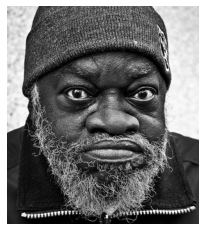

In [230]:
A = cv2.imread('dudepic.jpg',0)
plt.imshow(A, cmap='gray', )
plt.axis('off')

In [231]:
print(f'Height of image: {A.shape[0]} px\nWidth of the image: {A.shape[1]} px')

Height of image: 340 px
Width of the image: 300 px


The height and width, i.e. the amount of pixels in height and width composing the picture can be seen as the entries of a matrix having those same dimensions.

Here I will build my PCA algorithm, taking as input the matrix of data $\mathrm{A}$, computing its SVD, truncating it, and then recomputing the approximated output $\mathrm{\hat{A}}$.

In [232]:
def reduce_dim(inp, n_dims = 20):
    U,S,Vh = inp
    return U[:,:n_dims] @ (np.eye(n_dims) * S[:n_dims]) @ Vh[:n_dims,:]
#Doing some magic to return a M x N matrix through (M x k) (k x k) (k x N)

def PCA_algorithm(image, n_dims = 20):
    assert isinstance(image, numpy.ndarray)
    num_data,dim = image.shape
    U, S, Vh = np.linalg.svd(image)
    return reduce_dim((U, S, Vh), n_dims)

In [233]:
output = PCA_algorithm(A)

I will now proceed to plot the several outputs truncating at different dimensions. I would expect the image to get progressively better as we keep on adding dimensions.

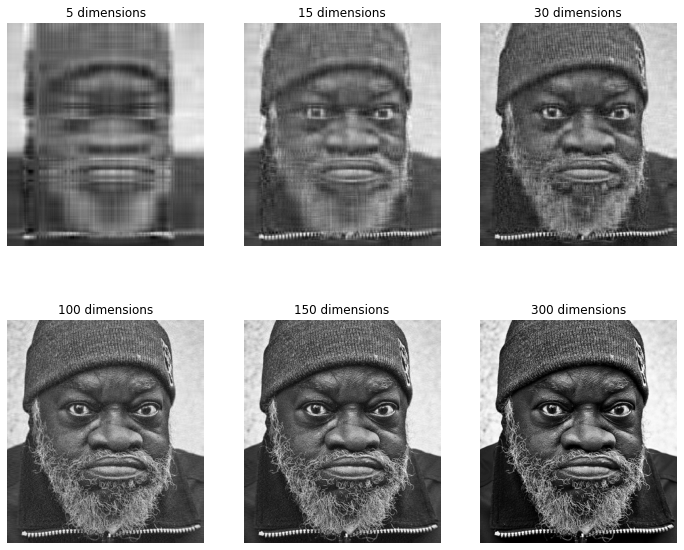

In [234]:
fig, axarr = plt.subplots(2, 3)
fig.set_size_inches(12, 10)
number_dimensions = [5,15,30,100,150,300]
idx=0
for j in range(2):
    for i in range(3):
        img_plot = PCA_algorithm(A, n_dims=number_dimensions[idx])
        axarr[j, i].imshow(img_plot)
        axarr[j, i].axis('off')
        axarr[j, i].set_title(f'{number_dimensions[idx]} dimensions')
        idx+=1

As we can see we have an image we can recognize almost immediately, keeping only 10 (!!) dimensions out of 300. We progressively get better, and at 100 (1/3 of the dimensions) we have a pretty good picture already. The rest is just adding the icing on top of the cake and the fine details.

## Best Choice for the number of dimensions

It boils down to answering the question: How many number of dimensions should I keep in my model?\
It seems clear even by the example of the image that very few dimensions contain lots of information about the model, and as we include more of them, the marginal information added by the inclusion of another dimension is progressively smaller. As we can see from the log of the Singular Values' graph.

<AxesSubplot:xlabel='index', ylabel='vals'>

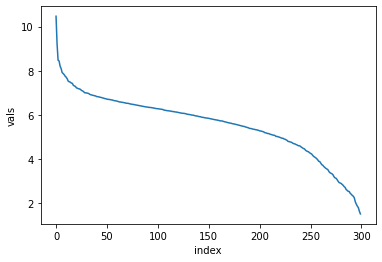

In [235]:
def PCA_algorithm(image):
    assert isinstance(image, numpy.ndarray)
    num_data,dim = image.shape
    U, S, Vh = np.linalg.svd(image)
    return S
importance = np.log(pd.Series(PCA_algorithm(A))).reset_index().rename(columns={0:'vals'})
sns.lineplot(data=importance, x='index', y='vals')

And the question remains, which can be translated to a tradeoff between **Complexity** and **Accuracy** of the model. Some researches came up with answers to that same question, in different ways. In particular, two papers are the relevant literature when it comes to this issue (SkLearn by default proposes the latter one):
<ul>
    <li>The Optimal Hard Threshold for Singular Values is $\frac{4}{\sqrt{3}}$. Matan Gavish and David L. Donoho, 2014
    <li>Automatic choice of dimensionality for PCA. TP Minka, 2000
<ul>
    